## Credit Score Prediction

### Overview

**The Credit Score Prediction project aims to classify customers into appropriate credit score ranges based on various financial and personal attributes. This classification helps financial institutions assess creditworthiness and make informed lending decisions, ultimately contributing to better risk management.**

### Problem Statement

***In today's financial landscape, assessing a customer's creditworthiness is crucial for lending decisions. Traditional methods of credit assessment can be slow and subjective. By utilizing machine learning techniques, this project seeks to automate the prediction of credit scores, allowing institutions to quickly evaluate potential borrowers based on their financial behaviors and attributes.***

## Dataset:

**The dataset includes the following 28 features (columns):**

ID: A unique identifier for each entry in the dataset, typically a sequential number.

Customer_Id: A unique identification number assigned to each customer for tracking purposes.

Age: The age of the customer, measured in years.

SSN: The Social Security Number assigned to the customer, used for identification and tax purposes.

Occupation: The job title or profession of the customer, indicating their employment status.

Annual_Income: The total income of the customer earned in a year, before taxes, expressed in USD.

Month_Inhand_Salary: The fixed amount of salary received by the customer on a monthly basis, expressed in USD.

Num_Bank_Accounts: The total number of bank accounts owned by the customer, which can include savings, checking, and other account types.

Num_Credit_Card: The number of credit cards held by the customer, which may impact their credit utilization and credit score.

Interest_Rate: The percentage interest charged on the customer's credit cards, which affects their total debt repayment.

Num_of_loan: The total number of loans that the customer has taken from financial institutions.

Type_of_loan: The categories of loans the customer has taken, such as personal loans, auto loans, or mortgages.

Delay_from_due_date: The number of days the customer is late in making payments after the due date.

Num_of_Delayed_payment: The number of payments that the customer has made late.

Change_Credit_Limit: The percentage increase or decrease in the customer's credit card limit over time.

Num_Credites_Inquiries: The total number of times the customer’s credit report has been checked by lenders in response to credit applications.

Credit_Mix: The variety of credit types the customer holds.

Outstanding_Debt: The total amount of debt that the customer currently owes, expressed in USD.

Credit_Utilization_Ratio: The ratio of the customer's credit card balances to their total credit limits, expressed as a percentage.

Credit_History_Age: The length of time the customer has had credit accounts open.

Payment_of_Min_Amount: A binary indicator showing whether the customer has paid only the minimum required payment on their credit accounts.

Total_EMI_per_month: The total amount of equated monthly installments (EMIs) the customer pays on loans each month, expressed in USD.

Amount_Invested_Monthly: The amount the customer invests on a monthly basis, indicating their savings and investment behavior.

Payment_Behavior: The customer’s payment patterns, indicating whether they typically pay on time, are late, or miss payments.

Monthly_Balance: The average balance in the customer's accounts at the end of each month, expressed in USD.

Credit_Score: A categorical variable representing the customer's creditworthiness, typically classified as Poor, Standard, or Good.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/Supervised ML - Case Study 1/train.csv')

In [ ]:
credit.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [ ]:
credit.shape

(100000, 28)

In [ ]:
credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
credit['Customer_ID'].nunique()

12500

In [ ]:
credit.isnull().sum()/len(credit) * 100

,0
ID,0.000
Customer_ID,0.000
Month,0.000
Name,9.985
Age,0.000
SSN,0.000
Occupation,0.000
Annual_Income,0.000
Monthly_Inhand_Salary,15.002
Num_Bank_Accounts,0.000


In [ ]:
credit.duplicated().sum()

0

In [ ]:
credit.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [ ]:
# Check the value count for all the categorical columns

cat_cols = credit.select_dtypes(include='object').columns
cat_cols

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
for i in cat_cols:
  print(f"\n Column:  {i}")
  print(credit[i].value_counts())


 Column:  ID
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64

 Column:  Customer_ID
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

 Column:  Month
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

 Column:  Name
Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64

 Column:  Age
Age
38      2833
28      2829
31      2806
26

## Data Cleaning

In [ ]:
## A function to get rid of underscores and irrelevant chracters in a dataset

def text_cleaning(data):

  if data is np.NaN or not isinstance(data, str):
    return data

  else:
    return str(data).strip('_, "')

In [ ]:
credit = credit.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.nan)

In [ ]:
for i in cat_cols:
  print(f"\n Column:  {i}")
  print(credit[i].value_counts())


 Column:  ID
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64

 Column:  Customer_ID
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

 Column:  Month
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

 Column:  Name
Name
Langep              44
Stevex              44
Jessicad            39
Vaughanl            39
Raymondr            38
                    ..
McBrideq             4
Yinka Adegokec       4
Josephine Masonz     4
Vellacotto           4
Timothyl             3
Name: count, Length: 10128, dtype: int64

 Column:  Age
Age
38      2994
28    

In [ ]:
credit.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


### Data Type Conversion

In [ ]:
credit['Age'] = credit['Age'].astype('int')
credit['Annual_Income'] = credit['Annual_Income'].astype('float')
credit['Num_of_Loan'] = credit['Num_of_Loan'].astype('int')

credit['Outstanding_Debt'] = credit['Outstanding_Debt'].astype('float')
credit['Amount_invested_monthly'] = credit['Amount_invested_monthly'].astype('float')
credit['Monthly_Balance'] = credit['Monthly_Balance'].astype('float')


credit['Num_of_Delayed_Payment'] = pd.to_numeric(credit['Num_of_Delayed_Payment'], errors='coerce')


In [ ]:
credit['Changed_Credit_Limit'] = credit['Changed_Credit_Limit'].astype('float')

In [ ]:
credit.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,int64
SSN,object
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


## Exploratory Data Analysis

In [ ]:
credit['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


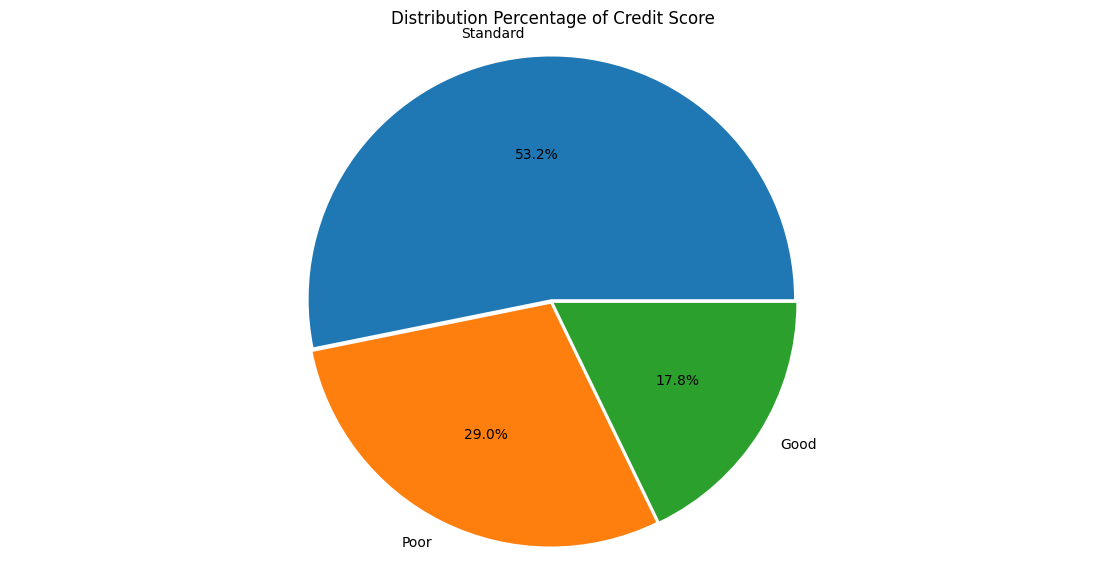

In [ ]:
# CHeck the distribution of Target Variable

plt.figure(figsize=(14, 7))
explode = [0.01, 0.01, 0.01]
plt.pie(credit['Credit_Score'].value_counts().values, labels=['Standard','Poor', 'Good'], explode = explode, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribution Percentage of Credit Score")
plt.show()


In [ ]:
num_cols = credit.select_dtypes(include='number').columns
num_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

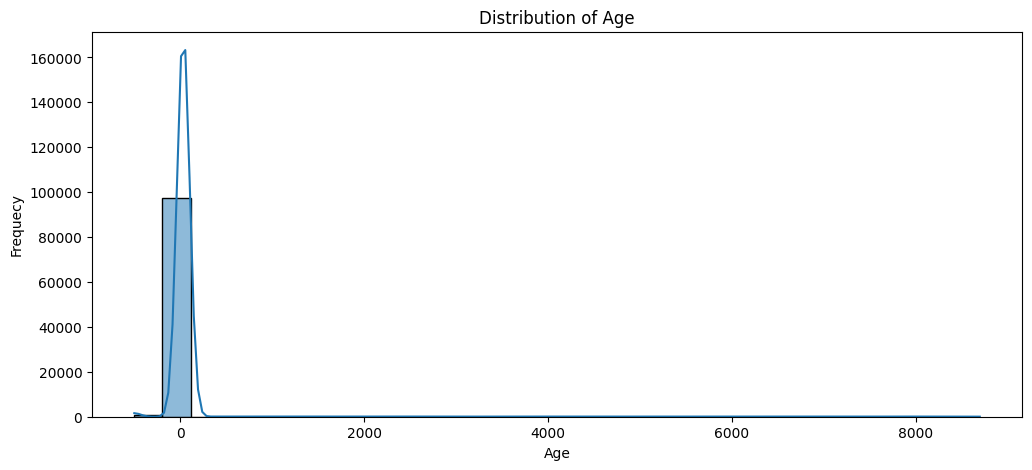

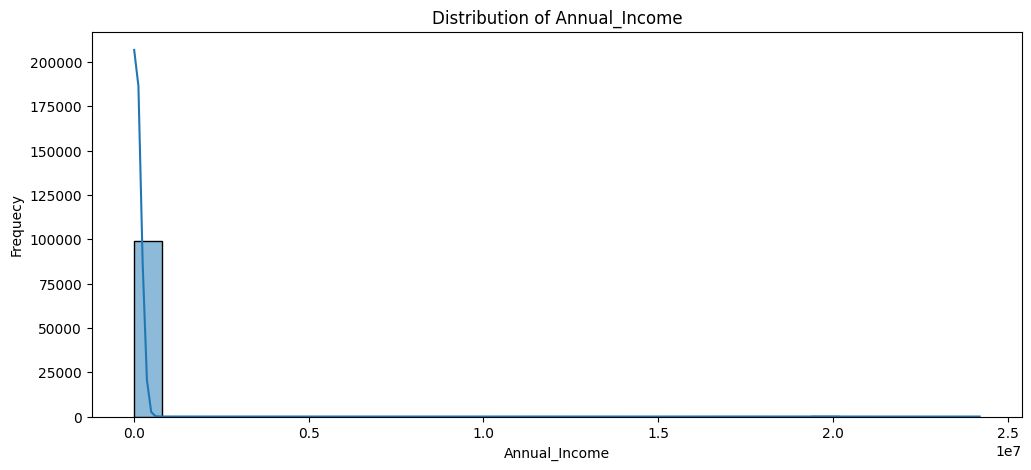

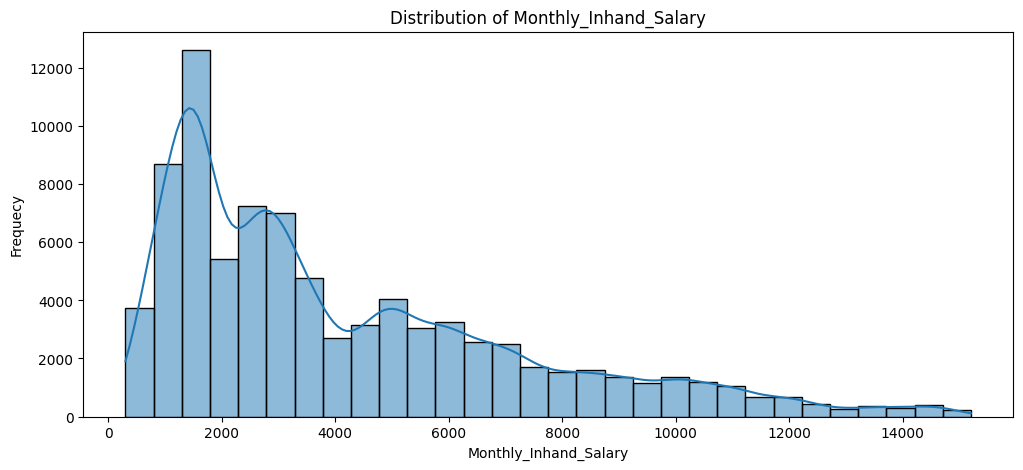

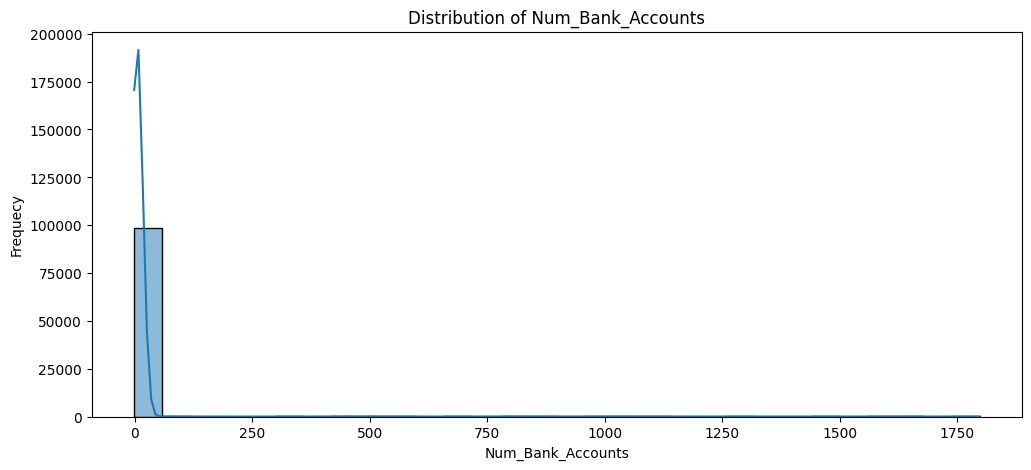

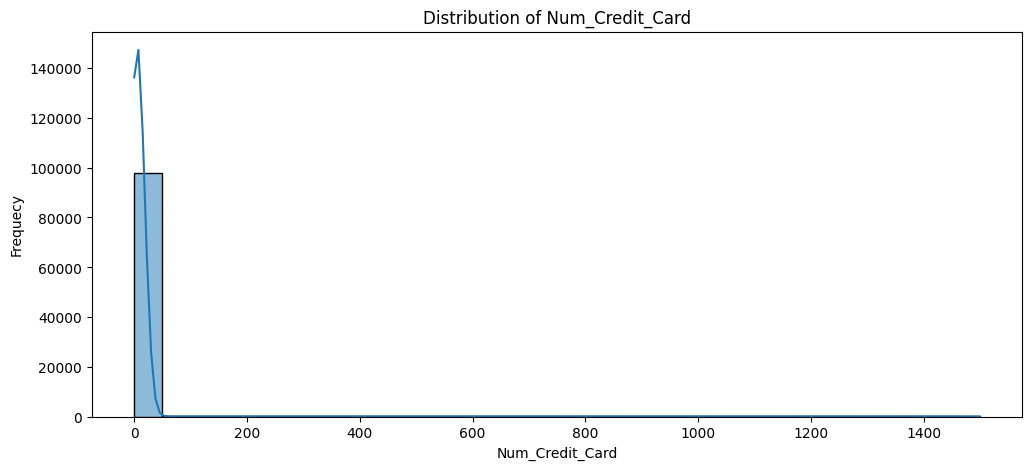

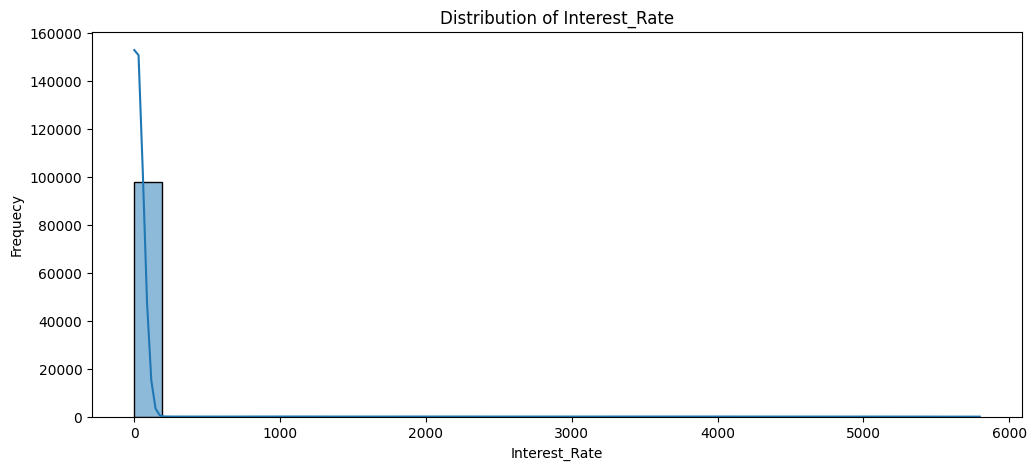

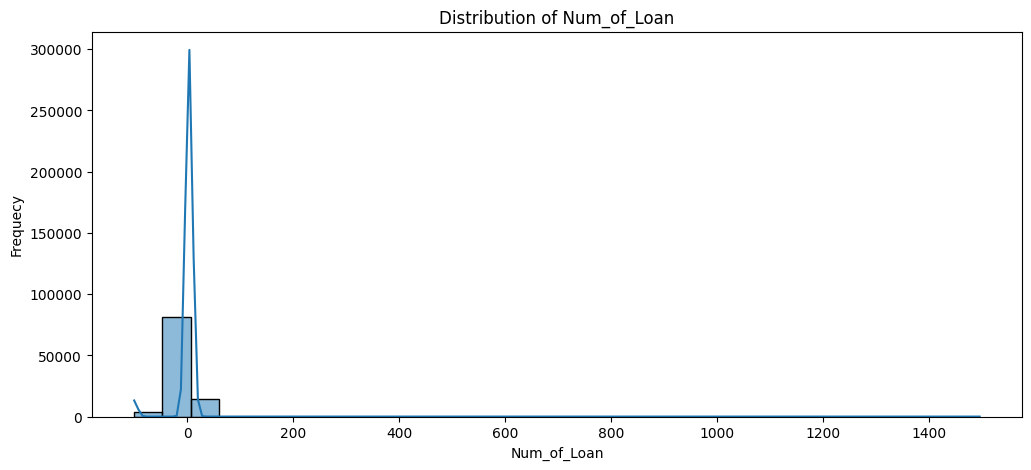

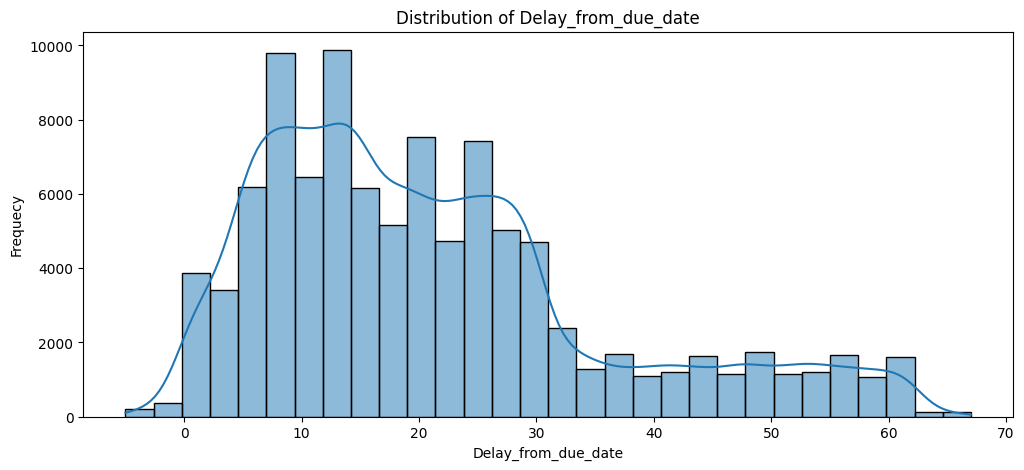

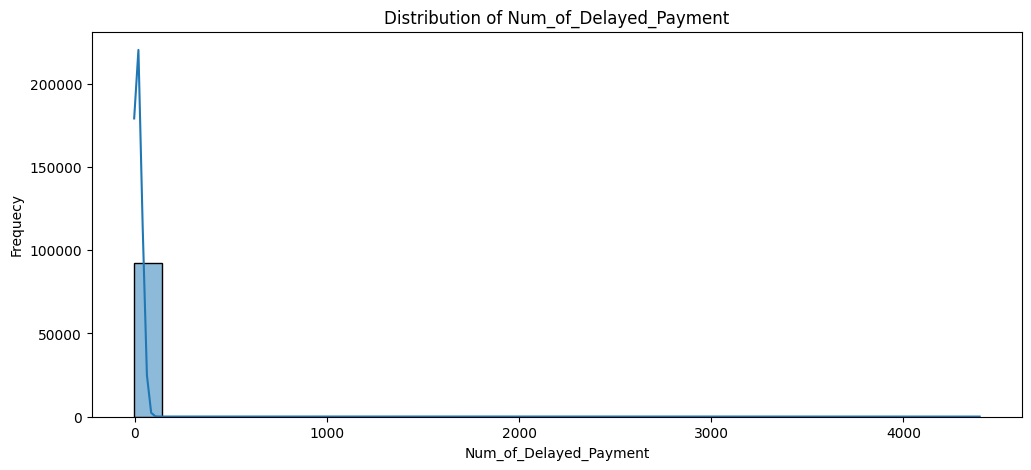

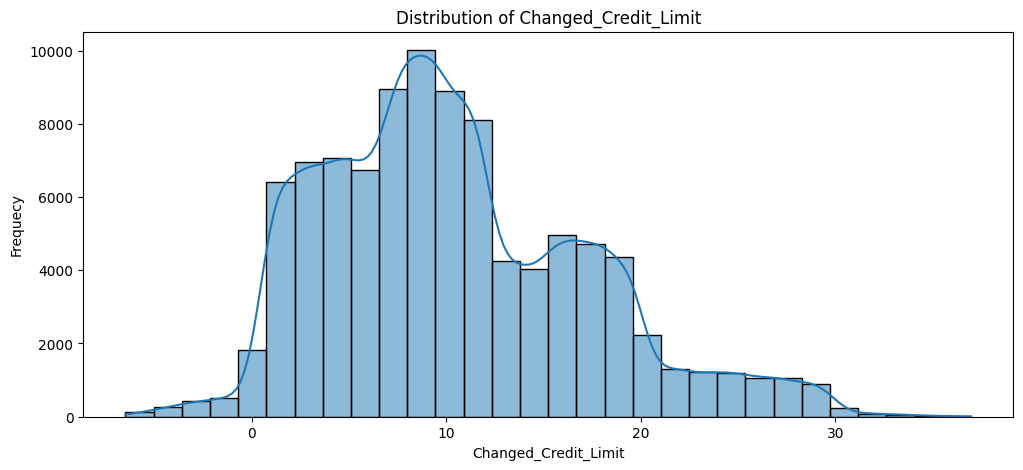

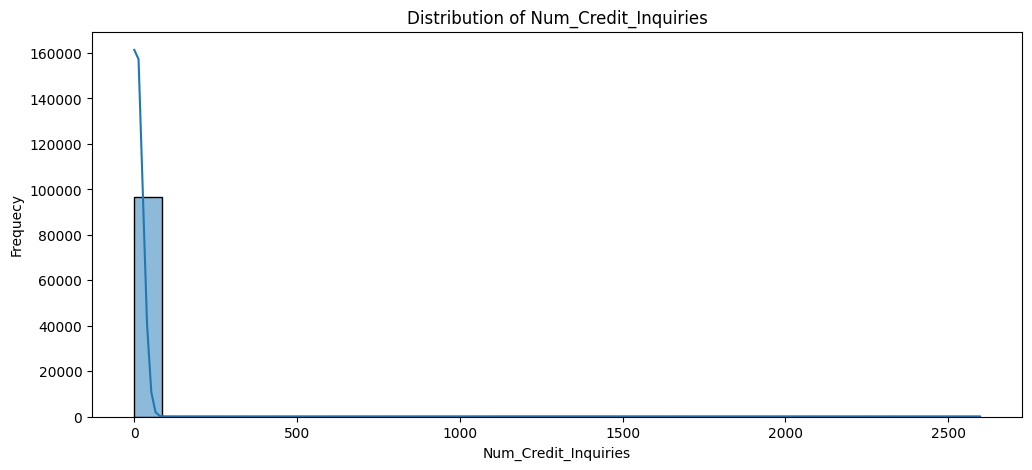

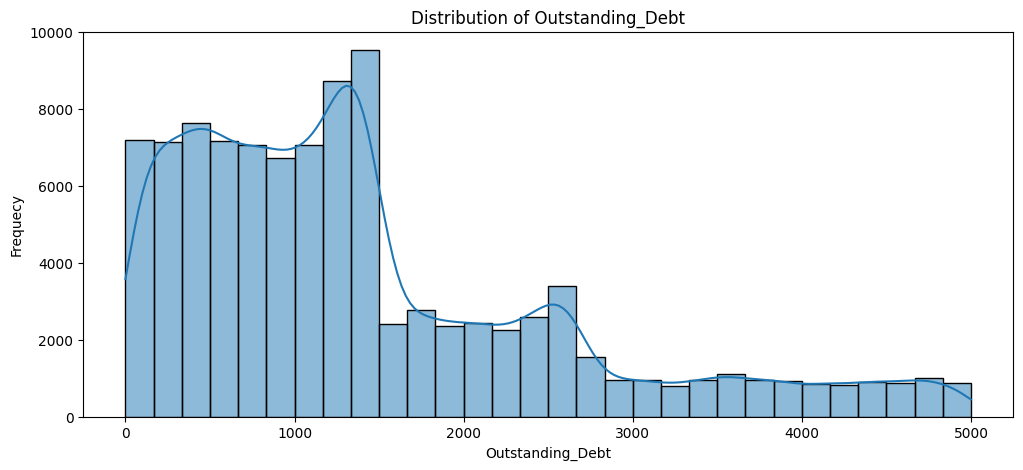

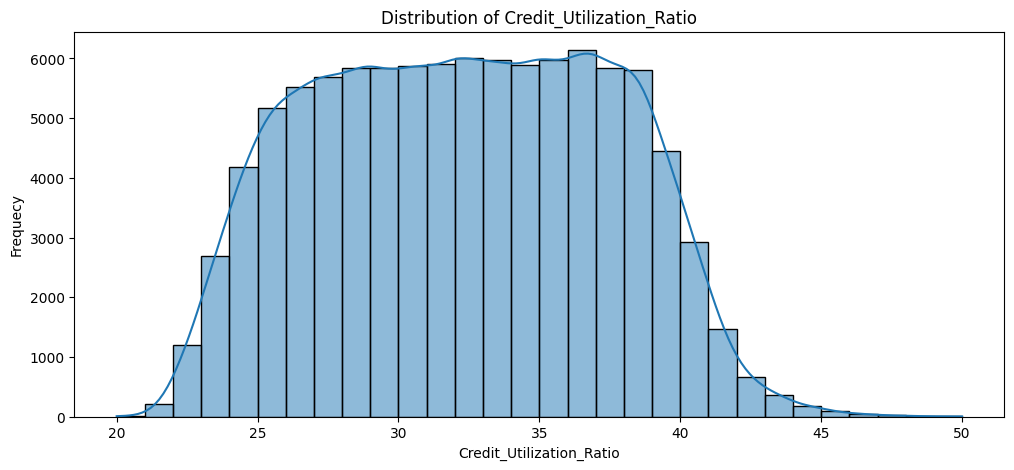

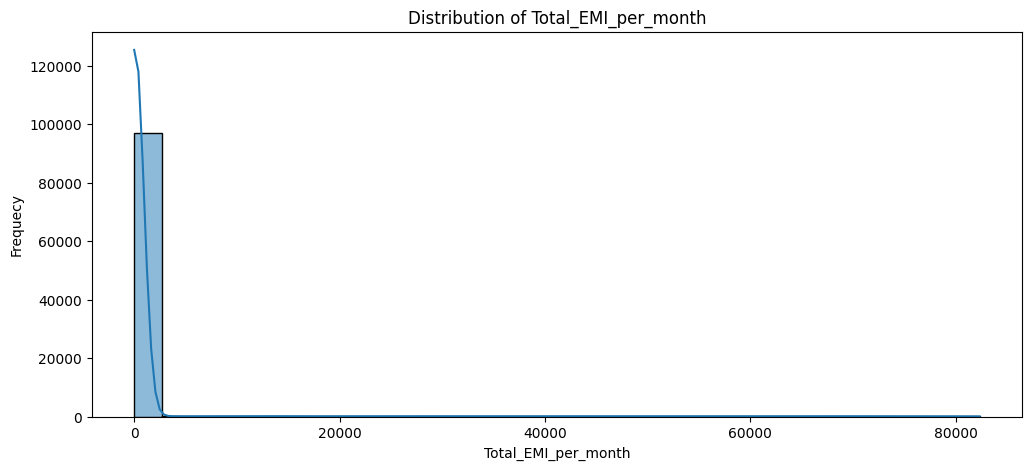

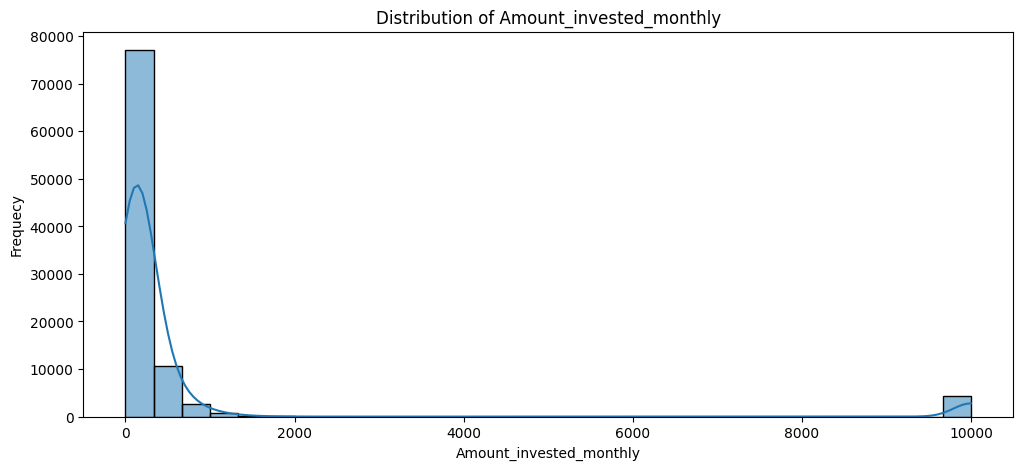

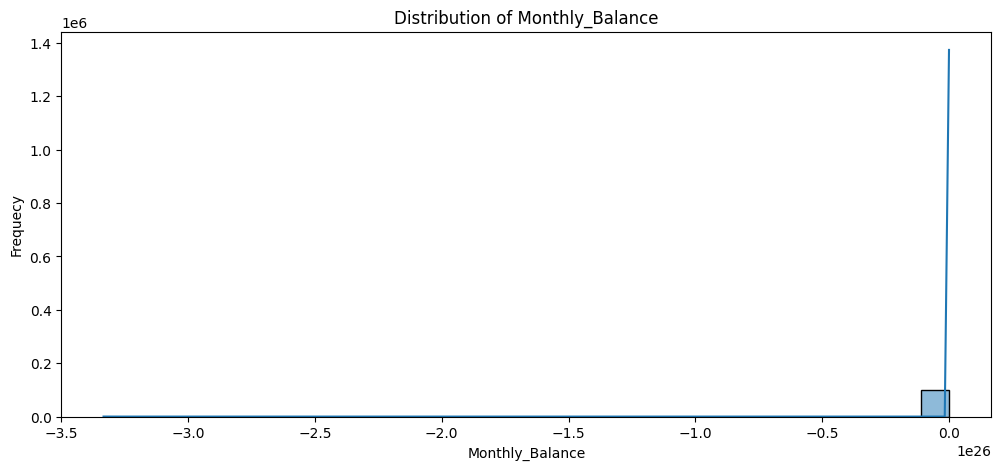

In [ ]:
for x in num_cols:

  plt.figure(figsize=(12, 5))
  sns.histplot(data=credit, x=x, kde=True, bins = 30)

  plt.xlabel(x)
  plt.ylabel('Frequecy')
  plt.title(f'Distribution of {x}')
  plt.show()

### Observations:

1-monthly in-hand salary: The histogram has a right-skewed distribution, meaning that most of the salaries are lower.

2-delay from the due date: The histogram has a right-skewed distribution, meaning that most of the delays are shorter. The peak of the histogram is around 10 days, which means that most of the delays are between 0 and 10 days. There are also a few delays that are longer than 60 days.

3-changed credit limit: The histogram has a right-skewed distribution, meaning that most of the changes in credit limits are negative. The peak of the histogram is around 0, which means that most of the changes in credit limits are between -10 and 0. There are also a few changes in credit limits that are positive.

4-outstanding debt: The histogram has a right-skewed distribution, meaning that most of the outstanding debt amounts are lower. The peak of the histogram is around 0, which means that most of the outstanding debt amounts are between 0 and 1000. There are also a few outstanding debt amounts that are higher than 4000.

5-credit utilization ratio: The histogram has a bell-shaped distribution, meaning that most of the credit utilization ratios are around 30%. There are also a few credit utilization ratios that are higher than 40%.



In [ ]:
cat_cols = credit.select_dtypes(include='object').columns
cat_cols

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [ ]:
credit['Type_of_Loan'].value_counts()

,count
Type_of_Loan,
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
...,...
"Not Specified, Mortgage Loan, Auto Loan, and Payday Loan",8
"Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan",8
"Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan",8


In [ ]:
credit['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [ ]:
cat_cols

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

### Bi-Variate Analysis

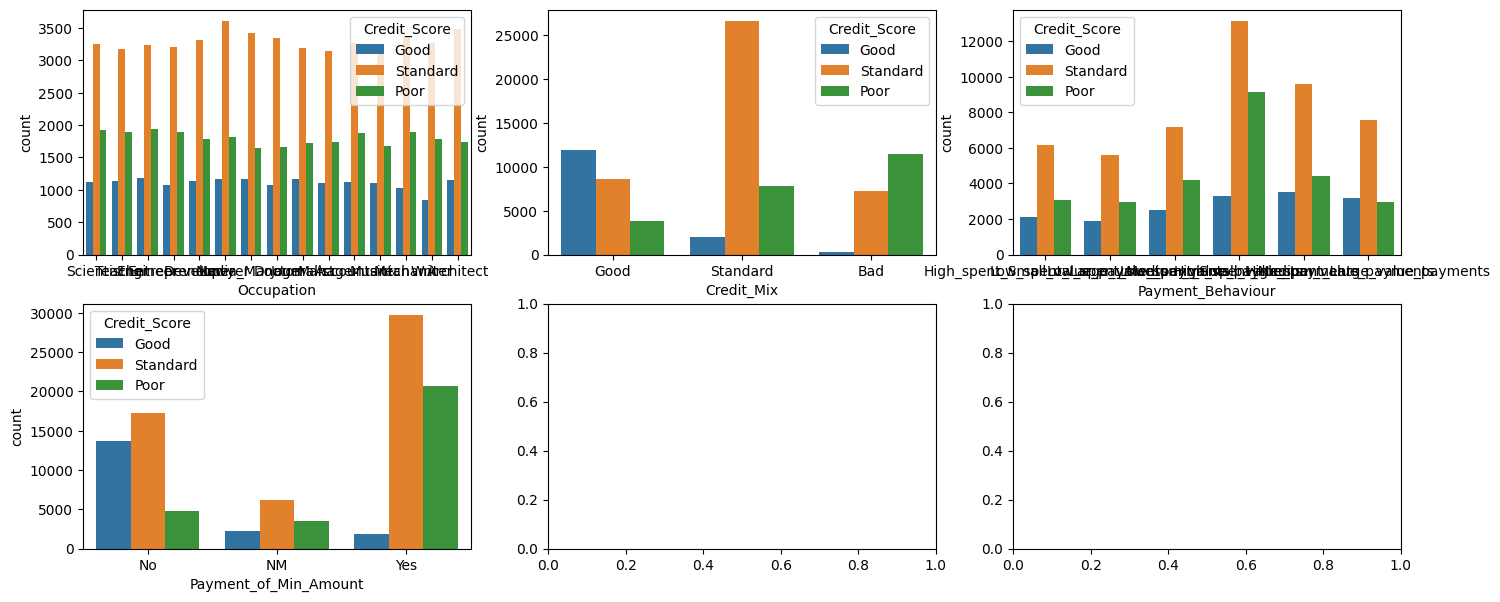

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(17, 7))

sns.countplot(x='Occupation', hue = 'Credit_Score', data=credit, ax=ax[0, 0])
sns.countplot(x='Credit_Mix', hue = 'Credit_Score', data=credit, ax=ax[0, 1])
sns.countplot(x='Payment_Behaviour', hue = 'Credit_Score', data=credit, ax=ax[0, 2])
sns.countplot(x='Payment_of_Min_Amount', hue = 'Credit_Score', data=credit, ax=ax[1, 0])
plt.show()


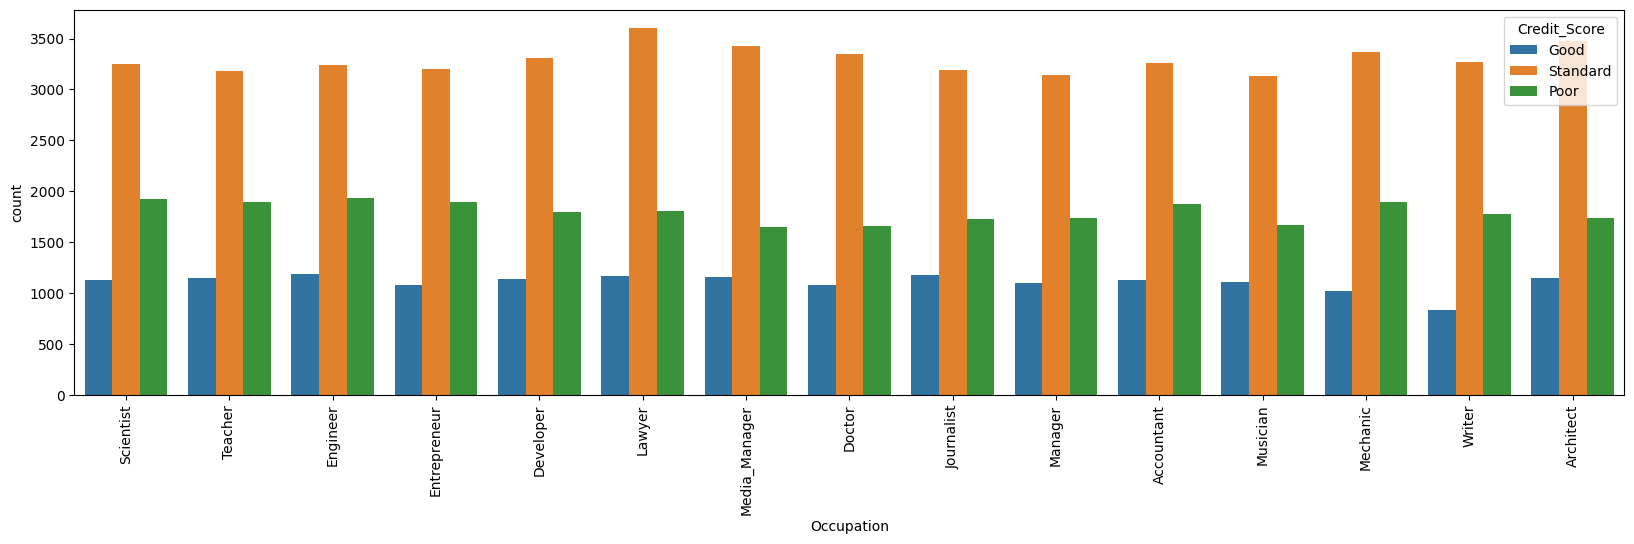

In [ ]:
plt.figure(figsize=(20, 5))

sns.countplot(x='Occupation', hue = 'Credit_Score', data=credit)
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

### 1. Handling Missing Values

In [ ]:
credit.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,August,NaN,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,NaN,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [ ]:
credit.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,5572
Occupation,7062
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


### KNN (K-Nearest Neighbors) imputation¶

It is a method used to fill in missing values in a dataset by leveraging the similarity between instances (rows) based on their feature values.

KNN imputation allows a more tailored and effective approach to handling missing data, ensuring that the resulting dataset retains its integrity and reflects meaningful relationships between features.

In [ ]:
# KNN Imputation

from sklearn.impute import KNNImputer

def knn_impute(data, col_name, n_neighbors = 5):
  col_impute = data[[col_name]]
  imputer = KNNImputer(n_neighbors=n_neighbors)
  col_imputed = imputer.fit_transform(col_impute)

  data[col_name] = data[col_name].astype('float')
  data[col_name] = col_imputed
  return data

In [ ]:
credit = knn_impute(credit, 'Monthly_Inhand_Salary')
credit = knn_impute(credit, 'Num_of_Delayed_Payment')
credit = knn_impute(credit, 'Monthly_Balance')
credit = knn_impute(credit, 'Amount_invested_monthly')
credit = knn_impute(credit, 'Changed_Credit_Limit')
credit = knn_impute(credit, 'Num_Credit_Inquiries')

In [ ]:
credit.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,5572
Occupation,7062
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


#### Fill categorical columns: Forward filling is useful in this context as these values doesn't change frequently.

In [ ]:
# Fill Categorical columns

credit['Occupation'] = credit['Occupation'].fillna(method = 'bfill')
credit['Credit_Mix'] = credit['Credit_Mix'].fillna(method = 'ffill')
credit['Payment_Behaviour'] = credit['Payment_Behaviour'].fillna(method = 'ffill')

### Reasons for Removing Negative Values:¶
- Data Integrity: Negative values in columns such as Monthly_Balance, Num_of_Loan,or Age may indicate data entry errors, inconsistencies, or invalid records. Replacing these values helps maintain the integrity of the dataset.

- Analysis Accuracy: Many statistical analyses and machine learning models, assume non-negative values for certain features. Retaining negative values could skew results or lead to errors during analysis.

- Domain-Specific Validity: In a financial context, negative values may not make sense.For instance, a negative Monthly_Balance or Changed_Credit_Limit could be logically inconsistent, as these metrics typically represent positive quantities.


To handle this, we replace negative values with 0 to correct anomalies while preserving the dataset for further analysis.

In [ ]:
# select the list of column with negative input

neg_cols = ['Age', 'Num_of_Delayed_Payment',
            'Delay_from_due_date',
            'Num_Bank_Accounts',
            "Num_of_Loan",
            "Monthly_Balance",
            "Changed_Credit_Limit"]


for i in neg_cols:
  credit[i] = credit[i].apply(lambda x: abs(x))

In [ ]:
credit.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,5572
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [ ]:
credit['Credit_Mix'].dropna(inplace=True)

In [ ]:
credit.shape

(100000, 28)

In [ ]:
num_cols = credit.select_dtypes(include='number')
num_cols

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7.000000,11.270000,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,23,19114.12,4194.170850,3,4,3,4,1,30.923342,11.270000,4.0,809.98,31.944960,49.574949,118.280222,284.629162
2,500,19114.12,4194.170850,3,4,3,4,3,7.000000,10.389025,4.0,809.98,28.609352,49.574949,81.699521,331.209863
3,23,19114.12,4194.170850,3,4,3,4,5,4.000000,6.270000,4.0,809.98,31.377862,49.574949,199.458074,223.451310
4,23,19114.12,1824.843333,3,4,3,4,6,30.923342,11.270000,4.0,809.98,24.797347,49.574949,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7.000000,11.500000,3.0,502.38,34.663572,35.104023,60.971333,479.866228
99996,25,39628.99,3359.415833,4,6,7,2,18,7.000000,11.500000,3.0,502.38,40.565631,35.104023,54.185950,496.651610
99997,25,39628.99,3359.415833,4,6,5729,2,27,6.000000,11.500000,3.0,502.38,41.255522,35.104023,24.028477,516.809083
99998,25,39628.99,3359.415833,4,6,7,2,20,30.923342,11.500000,3.0,502.38,33.638208,35.104023,251.672582,319.164979


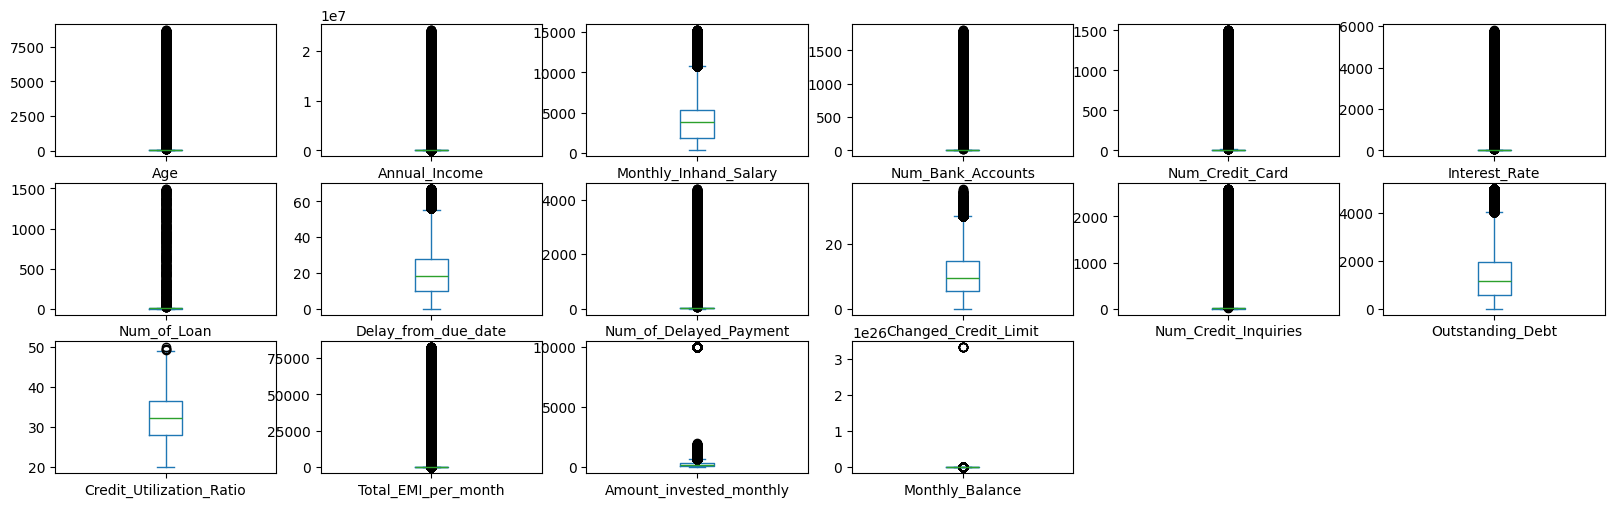

In [ ]:
fig, axes = plt.subplots(figsize=(20, 12))
num_cols.plot(kind = 'box', subplots = True, ax=axes, layout = (6, 6))
plt.show()

### Outliers and Skewness:

Variables like Age, Annual_Income, Num_Bank_Accounts, Num_Credit_Card, and Interest_Rate have unusually high maximum values compared to their means and interquartile ranges. This indicates significant outliers.

### Checking and Removing Outliers

capping outliers is a practical approach that balances the need for robust statistical analysis while retaining the richness of the dataset. It allows for a more nuanced treatment of extreme values, ultimately leading to more reliable insights.

In [ ]:
def cap_outliers(data, col_name):

  for i in col_name:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Visualizing before capping
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[i], color='lightblue')
    plt.title(f'{i} Distribution (Before Capping)')

    data[i] = np.where(data[i] < lower_bound, lower_bound, data[i])
    data[i] = np.where(data[i] > upper_bound, upper_bound, data[i])

    # Visualizing after capping
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[i], color='lightgreen')
    plt.title(f'{i} Distribution (After Capping)')

    plt.tight_layout()
    plt.show()

  return data

In [ ]:
num_cols.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

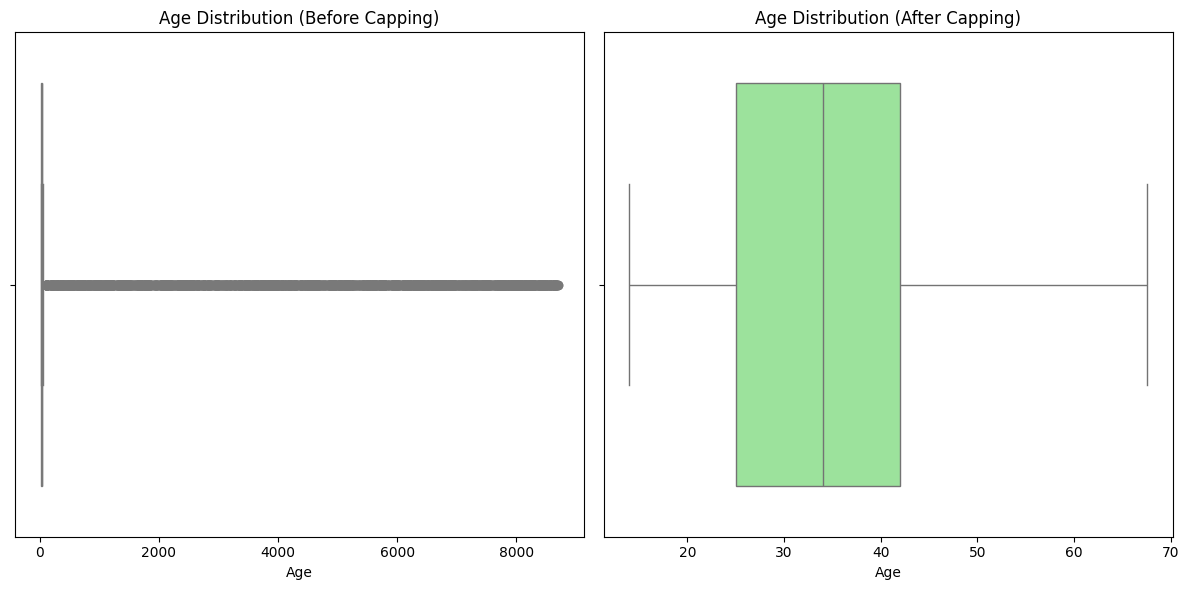

In [ ]:
credit = cap_outliers(credit, col_name=['Age'])

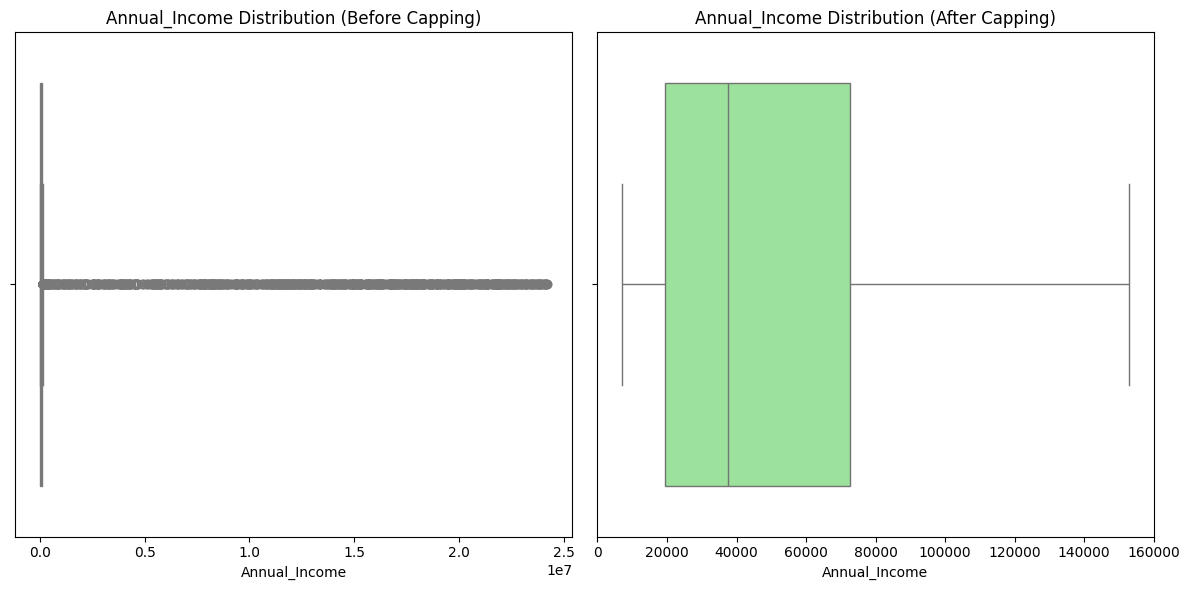

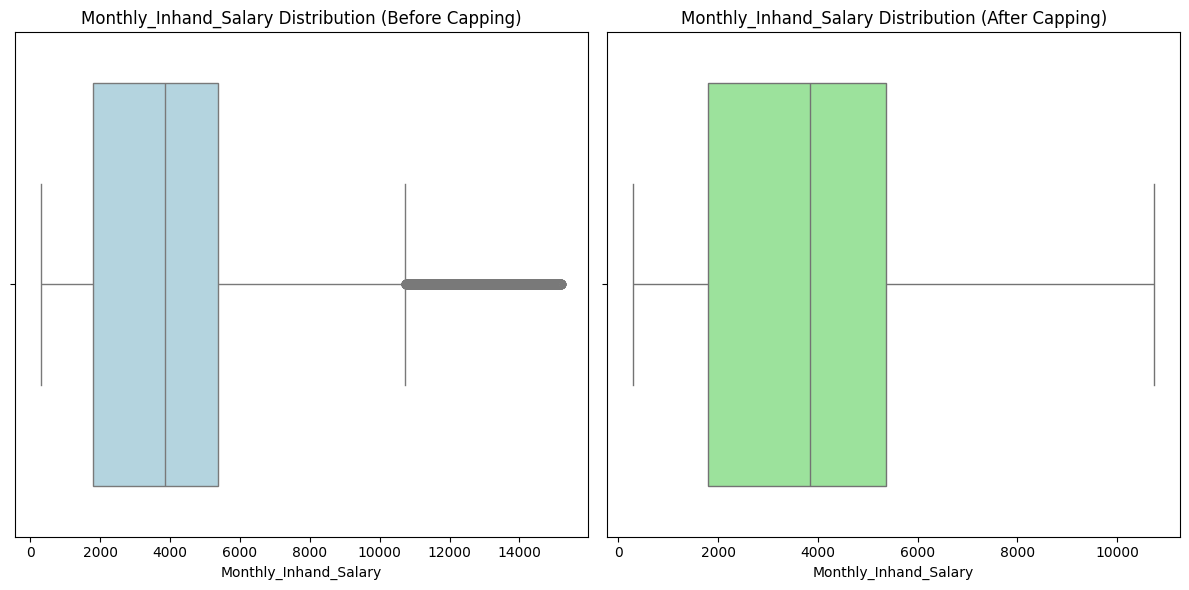

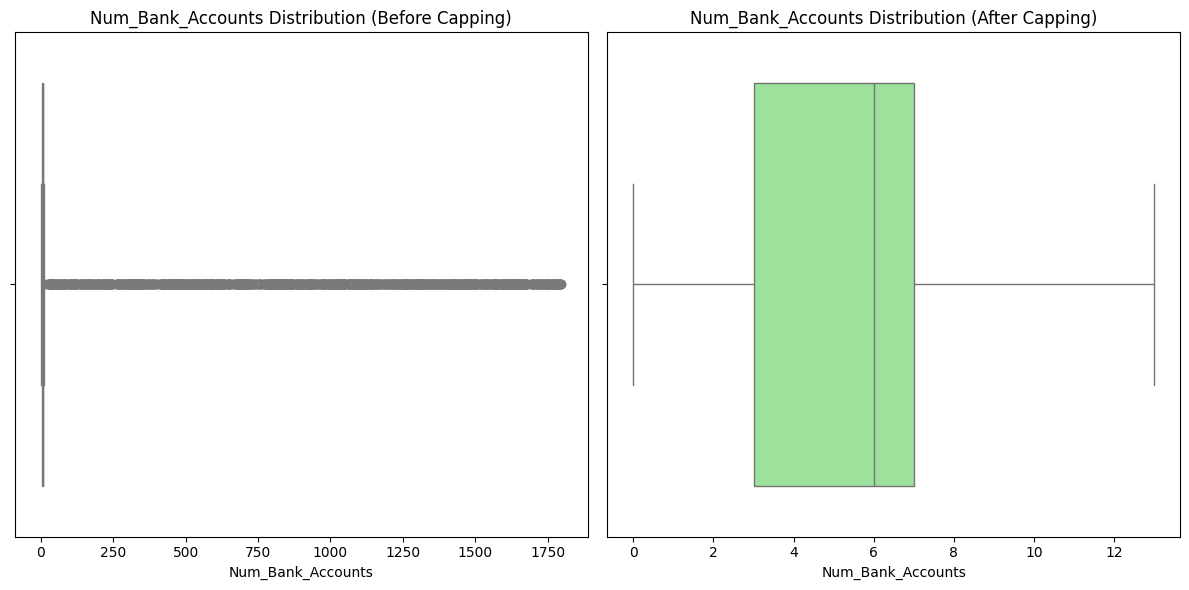

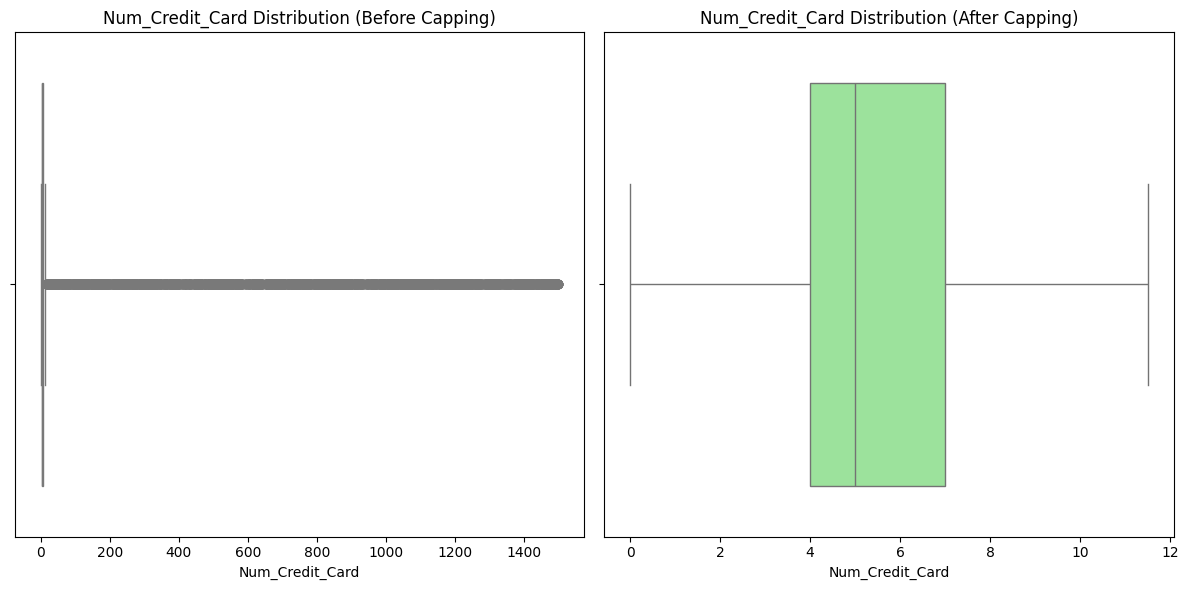

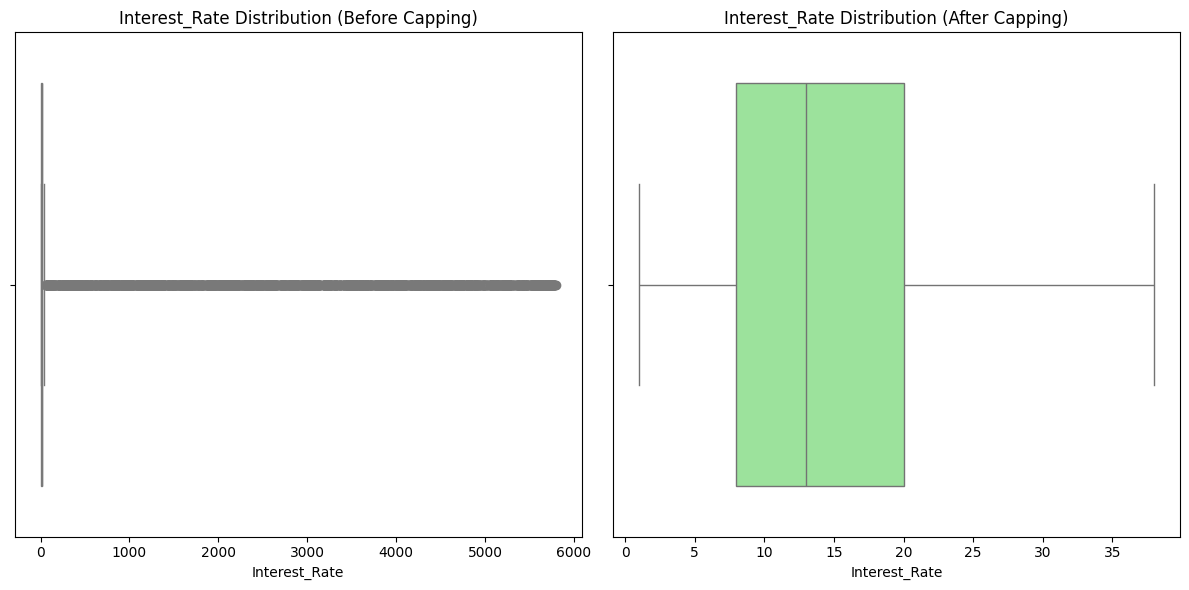

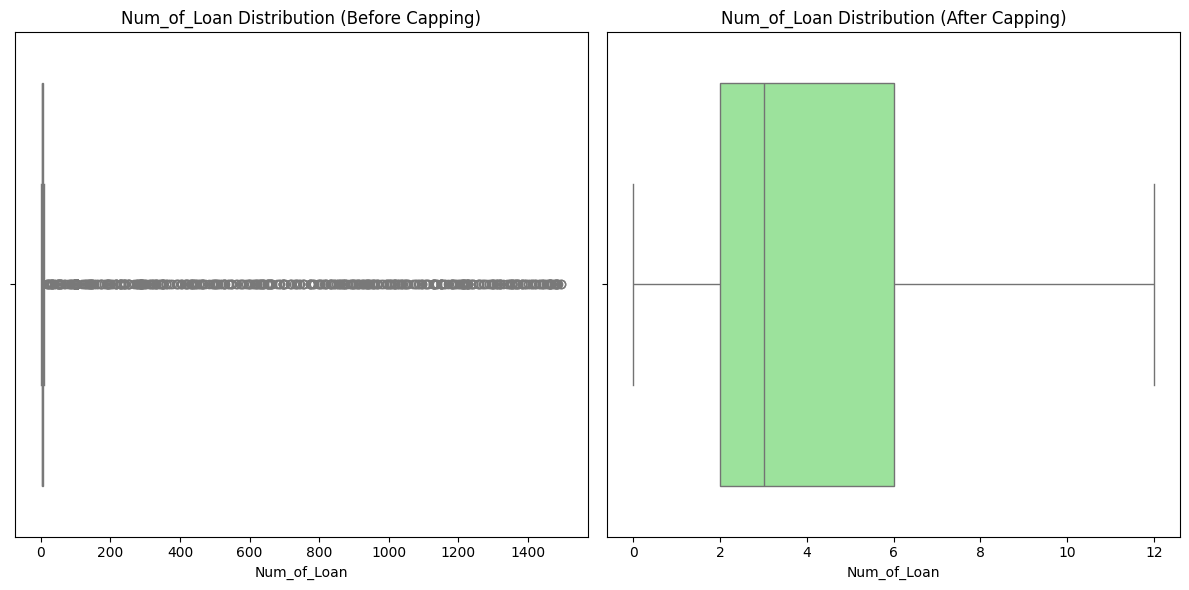

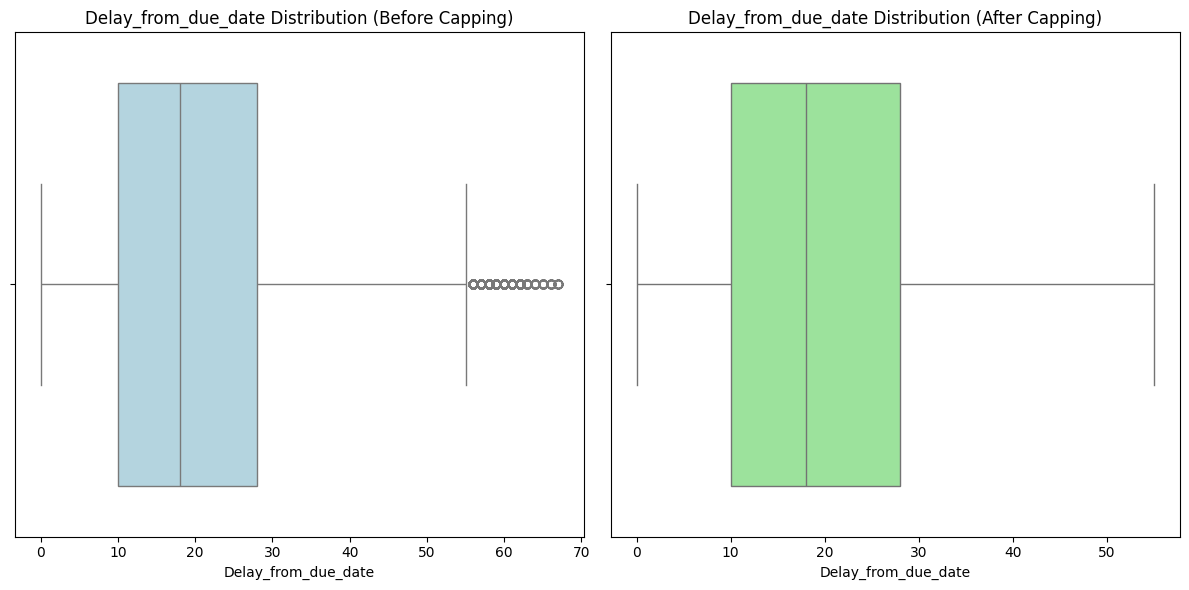

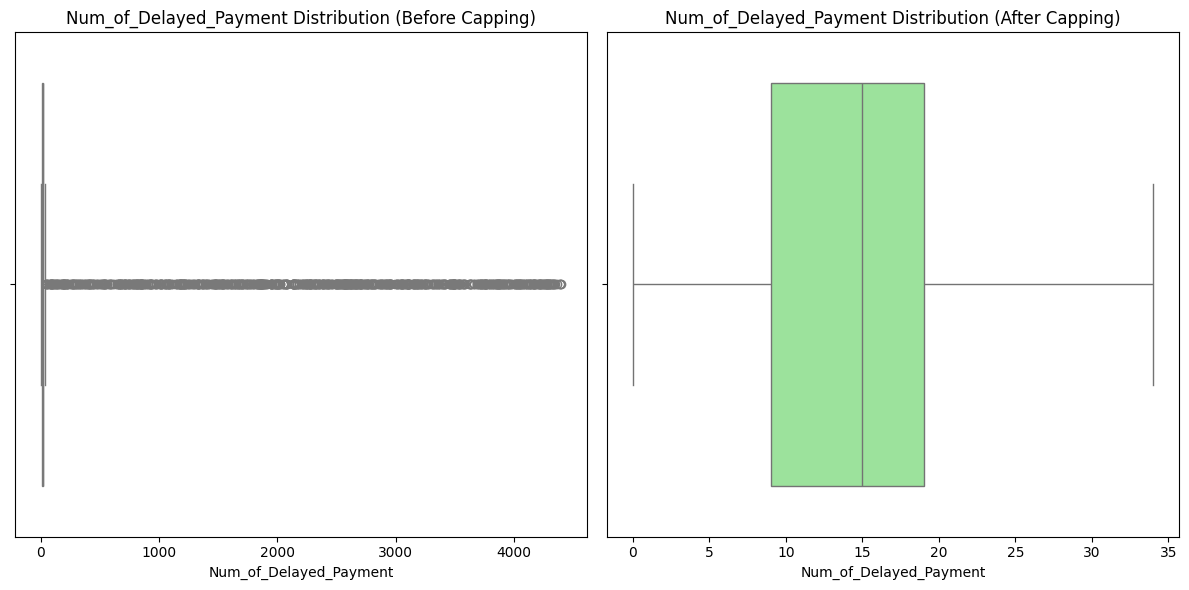

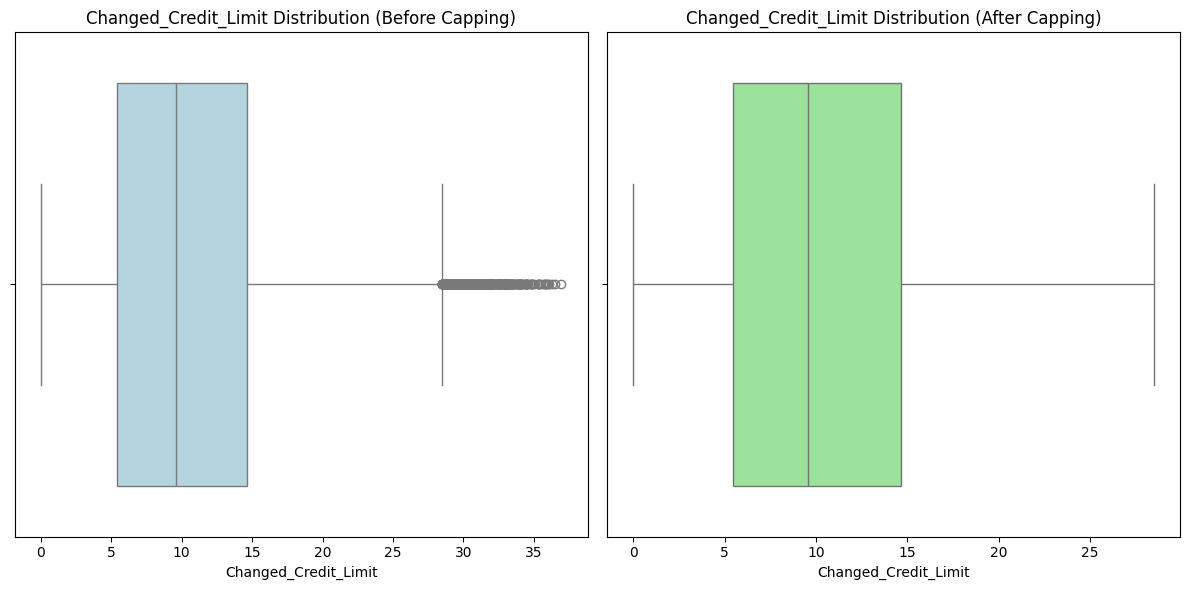

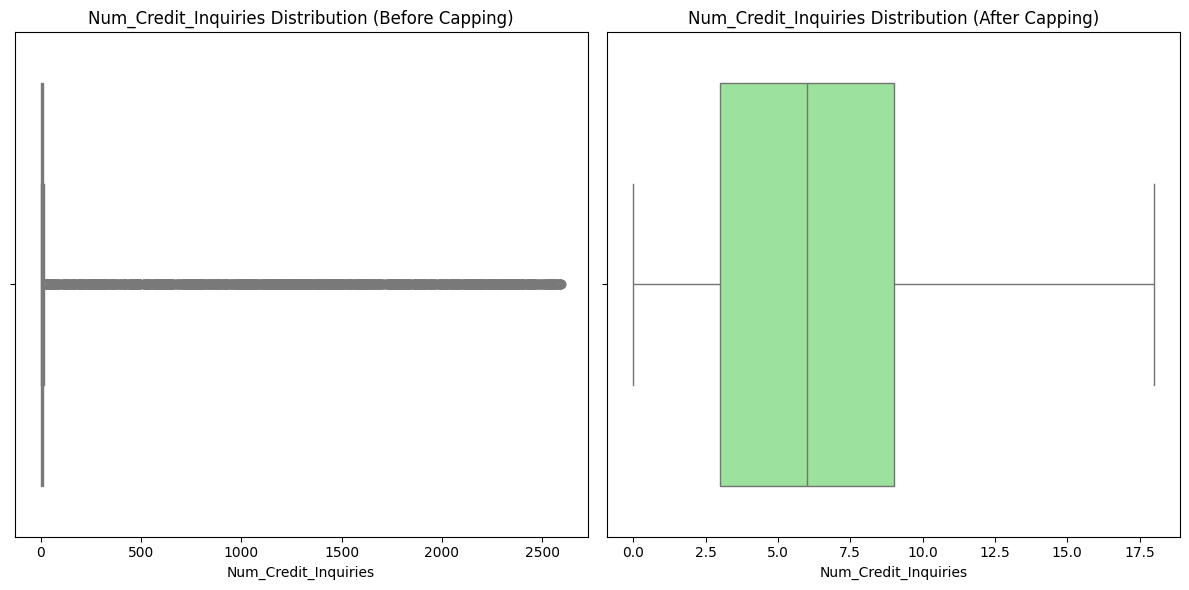

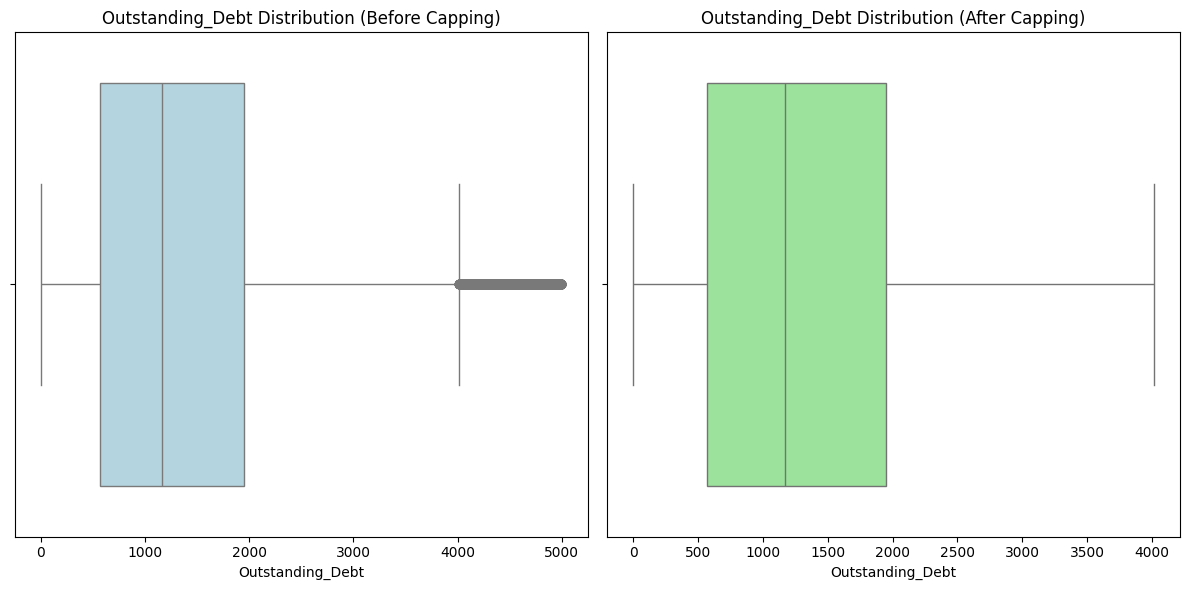

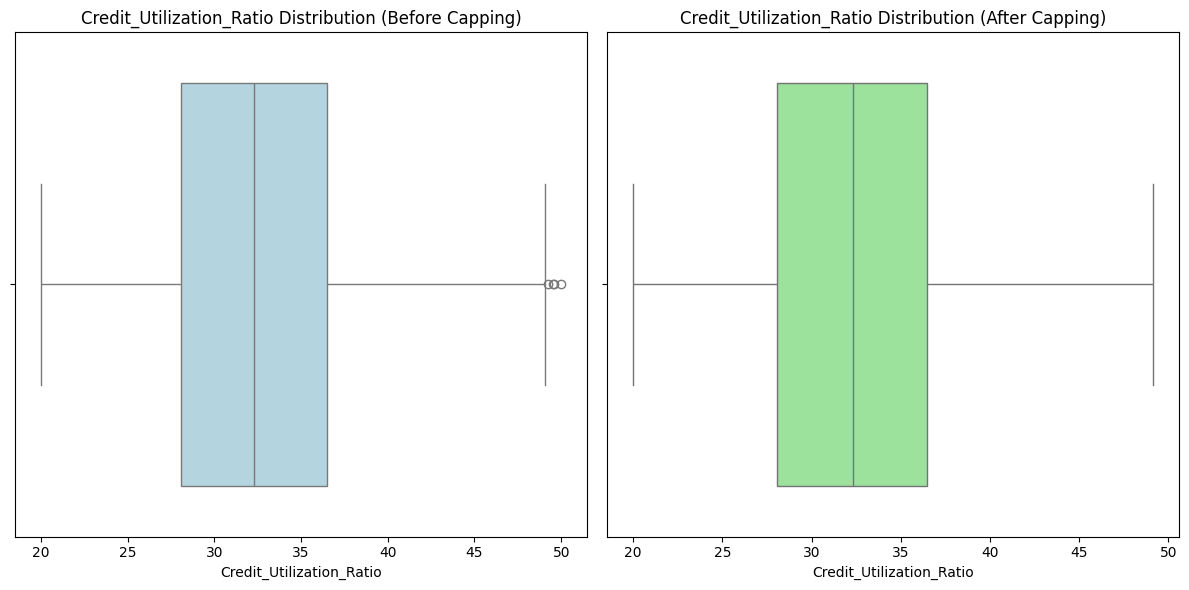

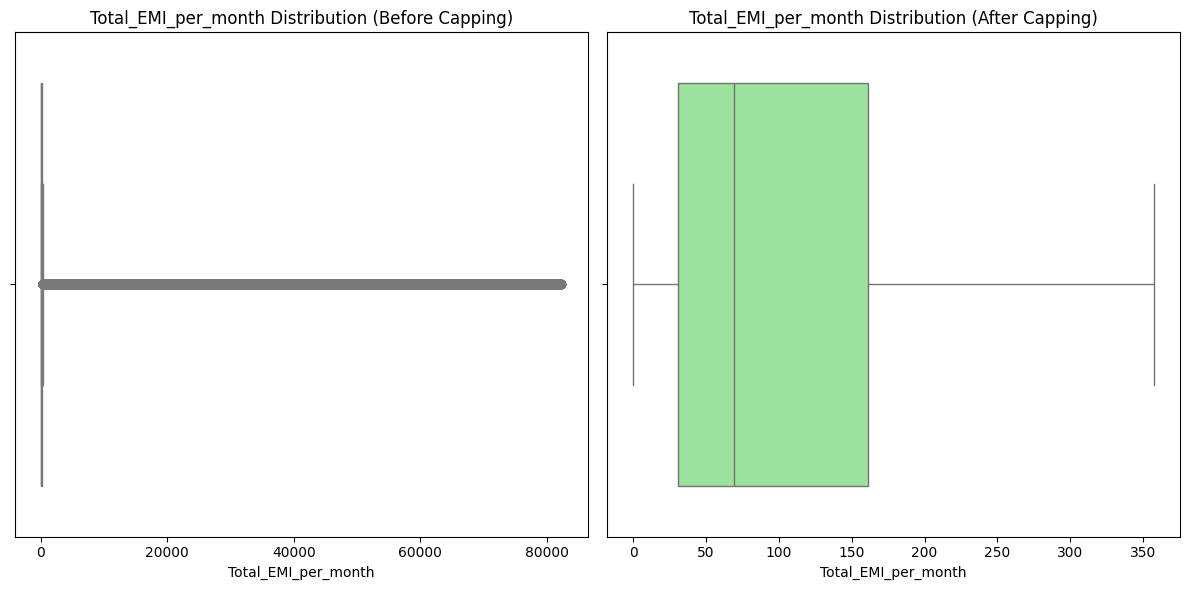

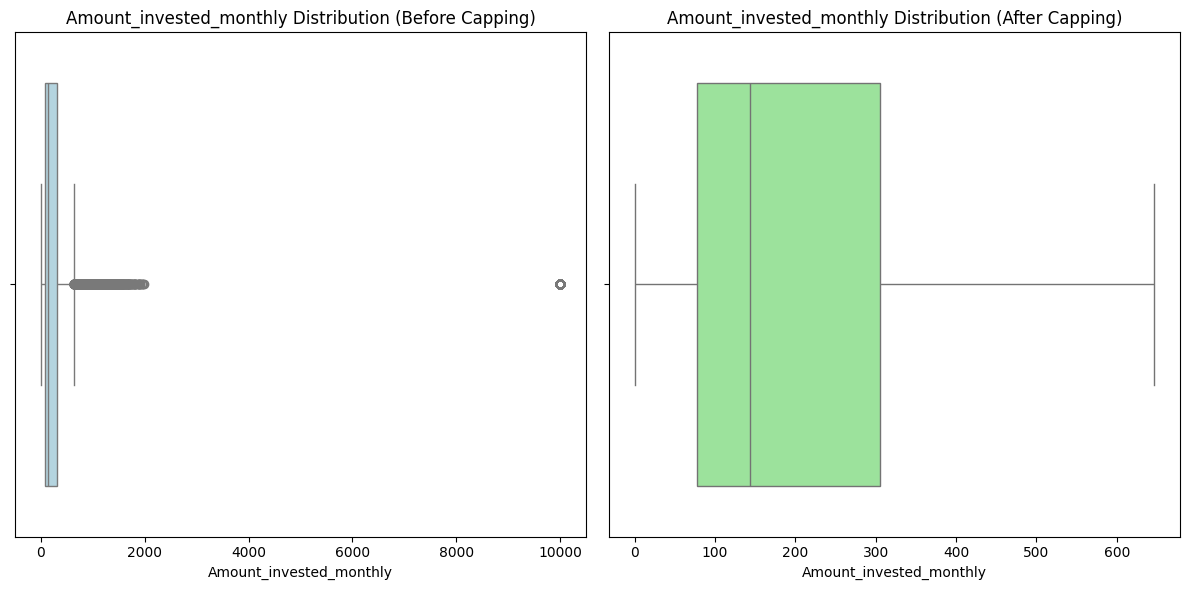

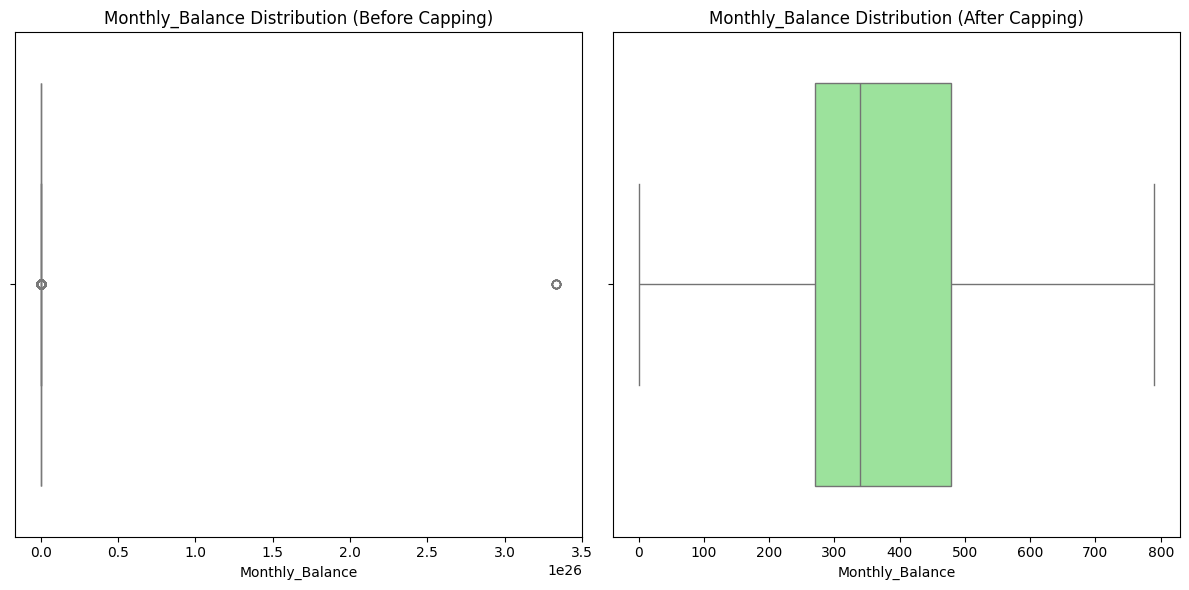

In [ ]:
credit = cap_outliers(credit, col_name=['Annual_Income'])
credit = cap_outliers(credit, col_name=['Monthly_Inhand_Salary'])
credit = cap_outliers(credit, col_name=['Num_Bank_Accounts'])
credit = cap_outliers(credit, col_name=['Num_Credit_Card'])
credit = cap_outliers(credit, col_name=['Interest_Rate'])
credit = cap_outliers(credit, col_name=['Num_of_Loan'])
credit = cap_outliers(credit, col_name=['Delay_from_due_date'])
credit = cap_outliers(credit, col_name=['Num_of_Delayed_Payment'])
credit = cap_outliers(credit, col_name=['Changed_Credit_Limit'])
credit = cap_outliers(credit, col_name=['Num_Credit_Inquiries'])
credit = cap_outliers(credit, col_name=['Outstanding_Debt'])
credit = cap_outliers(credit, col_name=['Credit_Utilization_Ratio'])
credit = cap_outliers(credit, col_name=['Total_EMI_per_month'])
credit = cap_outliers(credit, col_name=['Amount_invested_monthly'])
credit = cap_outliers(credit, col_name=['Monthly_Balance'])

In [ ]:
credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
cols_to_drop = ['ID', 'Name', 'SSN', 'Credit_History_Age', 'Type_of_Loan']

credit.drop(columns=cols_to_drop, inplace=True)

In [ ]:
credit.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,NaN,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,67.5,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
credit.set_index('Customer_ID', inplace=True)
credit.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,
CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,NaN,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
CUS_0xd40,February,23.0,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,1.0,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
CUS_0xd40,March,67.5,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,3.0,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
CUS_0xd40,April,23.0,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,5.0,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


### Encoding Categorical Columns

In [ ]:
tar_cols = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}

credit['Credit_Score'] = credit['Credit_Score'].map(tar_cols)


In [ ]:
cat_cols = credit.select_dtypes(include='object').columns
cat_cols

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

In [ ]:
cols = ['Month', 'Occupation', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cols:
  credit[i] = le.fit_transform(credit[i])


In [ ]:
credit.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,
CUS_0xd40,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,3,809.98,26.822620,1,49.574949,80.415295,2,312.494089,2
CUS_0xd40,2,23.0,12,19114.12,4194.170850,3.0,4.0,3.0,4.0,1.0,...,4.0,1,809.98,31.944960,1,49.574949,118.280222,3,284.629162,2
CUS_0xd40,6,67.5,12,19114.12,4194.170850,3.0,4.0,3.0,4.0,3.0,...,4.0,1,809.98,28.609352,1,49.574949,81.699521,4,331.209863,2
CUS_0xd40,0,23.0,12,19114.12,4194.170850,3.0,4.0,3.0,4.0,5.0,...,4.0,1,809.98,31.377862,1,49.574949,199.458074,5,223.451310,2
CUS_0xd40,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,4.0,1,809.98,24.797347,1,49.574949,41.420153,1,341.489231,2


## Model Building & Evaluation

In [ ]:
X = credit.drop('Credit_Score', axis = 1)
y = credit['Credit_Score']

In [ ]:
X

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
Customer_ID,,,,,,,,,,,,,,,,,,,,,
CUS_0xd40,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,11.270000,4.0,3,809.98,26.822620,1,49.574949,80.415295,2,312.494089
CUS_0xd40,2,23.0,12,19114.12,4194.170850,3.0,4.0,3.0,4.0,1.0,...,11.270000,4.0,1,809.98,31.944960,1,49.574949,118.280222,3,284.629162
CUS_0xd40,6,67.5,12,19114.12,4194.170850,3.0,4.0,3.0,4.0,3.0,...,10.389025,4.0,1,809.98,28.609352,1,49.574949,81.699521,4,331.209863
CUS_0xd40,0,23.0,12,19114.12,4194.170850,3.0,4.0,3.0,4.0,5.0,...,6.270000,4.0,1,809.98,31.377862,1,49.574949,199.458074,5,223.451310
CUS_0xd40,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,11.270000,4.0,1,809.98,24.797347,1,49.574949,41.420153,1,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS_0x942c,0,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,11.500000,3.0,1,502.38,34.663572,1,35.104023,60.971333,0,479.866228
CUS_0x942c,7,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,11.500000,3.0,1,502.38,40.565631,1,35.104023,54.185950,1,496.651610
CUS_0x942c,5,25.0,9,39628.99,3359.415833,4.0,6.0,38.0,2.0,27.0,...,11.500000,3.0,1,502.38,41.255522,1,35.104023,24.028477,0,516.809083


In [ ]:
# Balancing the Data

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
y_sm.value_counts()

,count
Credit_Score,
2,53174
1,53174
0,53174


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

### 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf_train = rf.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score

In [ ]:
print("Accuracy Score: ", accuracy_score(y_train, y_pred_rf_train))
print("F1 Score: ", f1_score(y_train, y_pred_rf_train, average='weighted'))

Accuracy Score:  1.0
F1 Score:  1.0


In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf, average='weighted'))
print("Classification Report: \n", classification_report(y_test, y_pred_rf))


Accuracy Score:  0.8524055790628429
F1 Score:  0.8507191279871676
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87     10715
           1       0.84      0.75      0.79     10617
           2       0.85      0.93      0.89     10573

    accuracy                           0.85     31905
   macro avg       0.85      0.85      0.85     31905
weighted avg       0.85      0.85      0.85     31905



### Feature Selection using Random Forest

In [ ]:
# Get feature importance scores
feature_importances = rf.feature_importances_

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance values
print(importance_df)

                     Feature  Importance
14          Outstanding_Debt    0.121724
7              Interest_Rate    0.092892
13                Credit_Mix    0.080086
9        Delay_from_due_date    0.079482
12      Num_Credit_Inquiries    0.053229
11      Changed_Credit_Limit    0.052138
16     Payment_of_Min_Amount    0.048151
5          Num_Bank_Accounts    0.042497
6            Num_Credit_Card    0.041862
10    Num_of_Delayed_Payment    0.039746
3              Annual_Income    0.039323
15  Credit_Utilization_Ratio    0.035881
17       Total_EMI_per_month    0.035656
1                        Age    0.035447
18   Amount_invested_monthly    0.034669
4      Monthly_Inhand_Salary    0.034558
20           Monthly_Balance    0.034338
8                Num_of_Loan    0.031075
2                 Occupation    0.026562
0                      Month    0.022282
19         Payment_Behaviour    0.018401


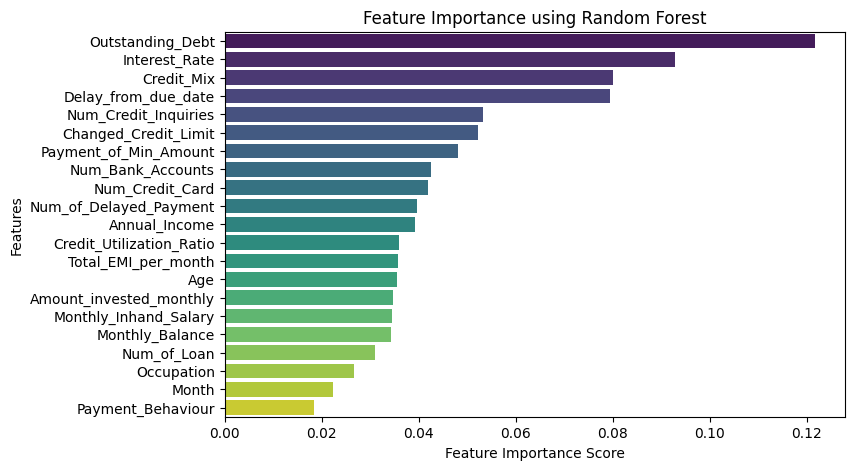

In [ ]:
# Set plot style
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Labels & Title
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")

plt.show()# Feature importance plot


In [ ]:
importance_df['Feature']

,Feature
14,Outstanding_Debt
7,Interest_Rate
13,Credit_Mix
9,Delay_from_due_date
12,Num_Credit_Inquiries
11,Changed_Credit_Limit
16,Payment_of_Min_Amount
5,Num_Bank_Accounts
6,Num_Credit_Card
10,Num_of_Delayed_Payment


In [ ]:
# Selected most important Features
features = [
   'Outstanding_Debt',
   'Credit_Mix',
   'Interest_Rate',
   'Delay_from_due_date',
   'Changed_Credit_Limit',
   'Num_Credit_Inquiries',
   'Num_of_Delayed_Payment',
   'Num_Bank_Accounts',
   'Num_Credit_Card',
   'Annual_Income',
   'Credit_Utilization_Ratio',
   'Amount_invested_monthly',
   'Total_EMI_per_month',
   'Age',
   'Monthly_Inhand_Salary'
]

In [ ]:
# Separate features and target variable
X= credit[features]
y = credit['Credit_Score']

In [ ]:
X

,Outstanding_Debt,Credit_Mix,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Num_of_Delayed_Payment,Num_Bank_Accounts,Num_Credit_Card,Annual_Income,Credit_Utilization_Ratio,Amount_invested_monthly,Total_EMI_per_month,Age,Monthly_Inhand_Salary
Customer_ID,,,,,,,,,,,,,,,
CUS_0xd40,809.98,3,3.0,3.0,11.270000,4.0,7.000000,3.0,4.0,19114.12,26.822620,80.415295,49.574949,23.0,1824.843333
CUS_0xd40,809.98,1,3.0,1.0,11.270000,4.0,30.923342,3.0,4.0,19114.12,31.944960,118.280222,49.574949,23.0,4194.170850
CUS_0xd40,809.98,1,3.0,3.0,10.389025,4.0,7.000000,3.0,4.0,19114.12,28.609352,81.699521,49.574949,67.5,4194.170850
CUS_0xd40,809.98,1,3.0,5.0,6.270000,4.0,4.000000,3.0,4.0,19114.12,31.377862,199.458074,49.574949,23.0,4194.170850
CUS_0xd40,809.98,1,3.0,6.0,11.270000,4.0,30.923342,3.0,4.0,19114.12,24.797347,41.420153,49.574949,23.0,1824.843333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS_0x942c,502.38,1,7.0,23.0,11.500000,3.0,7.000000,4.0,6.0,39628.99,34.663572,60.971333,35.104023,25.0,3359.415833
CUS_0x942c,502.38,1,7.0,18.0,11.500000,3.0,7.000000,4.0,6.0,39628.99,40.565631,54.185950,35.104023,25.0,3359.415833
CUS_0x942c,502.38,1,38.0,27.0,11.500000,3.0,6.000000,4.0,6.0,39628.99,41.255522,24.028477,35.104023,25.0,3359.415833


In [ ]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42,)

In [ ]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=300, bootstrap=True)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

In [ ]:
rf_pred_train = rf_model.predict(X_train)

In [ ]:
print("The model's accuracy on the train set is: " + str(accuracy_score(y_train,rf_pred_train)*100)+ "%")

The model's accuracy on the train set is: 100.0%


In [ ]:
print("The model's accuracy on the test set is: " + str(accuracy_score(y_test,rf_pred)*100)+ "%")

The model's accuracy on the test set is: 86.22159536122864%


### CatBoost Classifier

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

cat.fit(X_train, y_train)

Learning rate set to 0.101327
0:	learn: 1.0252563	total: 160ms	remaining: 2m 40s
1:	learn: 0.9695345	total: 243ms	remaining: 2m 1s
2:	learn: 0.9242697	total: 319ms	remaining: 1m 45s
3:	learn: 0.8883005	total: 398ms	remaining: 1m 38s
4:	learn: 0.8591018	total: 475ms	remaining: 1m 34s
5:	learn: 0.8342623	total: 546ms	remaining: 1m 30s
6:	learn: 0.8132073	total: 626ms	remaining: 1m 28s
7:	learn: 0.7950013	total: 707ms	remaining: 1m 27s
8:	learn: 0.7802685	total: 776ms	remaining: 1m 25s
9:	learn: 0.7670655	total: 847ms	remaining: 1m 23s
10:	learn: 0.7553641	total: 923ms	remaining: 1m 22s
11:	learn: 0.7452441	total: 1s	remaining: 1m 22s
12:	learn: 0.7361766	total: 1.08s	remaining: 1m 22s
13:	learn: 0.7286987	total: 1.18s	remaining: 1m 22s
14:	learn: 0.7223302	total: 1.25s	remaining: 1m 22s
15:	learn: 0.7167295	total: 1.32s	remaining: 1m 21s
16:	learn: 0.7120355	total: 1.4s	remaining: 1m 20s
17:	learn: 0.7073369	total: 1.47s	remaining: 1m 20s
18:	learn: 0.7033601	total: 1.55s	remaining: 1m 2

In [ ]:
# Prediction on Train Set
cat_pred_train = cat.predict(X_train)

In [ ]:
print("The model's accuracy on the train set is: " + str(accuracy_score(y_train,cat_pred_train)*100)+ "%")

The model's accuracy on the train set is: 82.88237460526419%


In [ ]:
# Prediction on Test Set
cat_pred = cat.predict(X_test)

In [ ]:
print("The model's accuracy on the test set is: " + str(accuracy_score(y_test,cat_pred)*100)+ "%")

The model's accuracy on the test set is: 80.62686099357468%


### XGB Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Prediction on Train Set
xgb_pred_train = xgb.predict(X_train)

In [ ]:
print("The model's accuracy on the train set is: " + str(accuracy_score(y_train,xgb_pred_train)*100)+ "%")

The model's accuracy on the train set is: 83.98019072694078%


In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_xgb))
print("F1 Score: ", f1_score(y_test, y_pred_xgb, average='weighted'))
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))

Accuracy Score:  0.8122551324243849
F1 Score:  0.8106485960527758
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82     10715
           1       0.80      0.72      0.76     10617
           2       0.81      0.90      0.85     10573

    accuracy                           0.81     31905
   macro avg       0.81      0.81      0.81     31905
weighted avg       0.81      0.81      0.81     31905



## Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
cf_matrix

array([[8722, 1077,  916],
       [1571, 7658, 1388],
       [ 196,  842, 9535]])

Text(120.72222222222221, 0.5, 'Actual')

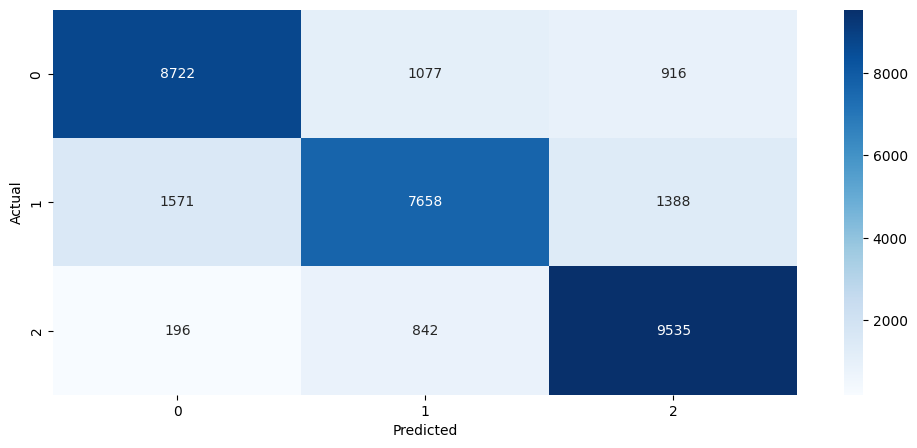

In [ ]:
plt.figure(figsize=(12, 5))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')